<a href="https://colab.research.google.com/github/zahra-jazini/AI-DS-Network-Security-Portfolio/blob/main/SentiADR_Sample_Notebook_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 SentiADR (Sample Implementation)
This notebook provides a complete and clean implementation of the SentiADR framework using a small subset of the Drugs.com dataset for demonstration purposes.

In [1]:

# ✅ Install required packages (Uncomment if using Colab)
!pip install pandas numpy scikit-learn nltk gensim matplotlib seaborn spacy
!python -m nltk.downloader stopwords
!python -m spacy download en_core_web_sm

  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
bigframes 2.4.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
     ━━━━━━━━━━

In [2]:
!pip install --upgrade --force-reinstall numpy pandas scikit-learn nltk gensim matplotlib seaborn spacy

  Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached matplotlib-3.10.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached spacy-3.8.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (27 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached scipy-1.15

In [3]:
!apt-get install -y graphviz libgraphviz-dev
!pip install pygraphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
libgraphviz-dev is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [4]:
!pip uninstall -y pandas
!pip install --no-cache-dir pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 150.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
bigframes 2.4.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.


In [5]:
import pandas as pd
print(pd.__version__)


2.2.3


In [2]:
import pandas as pd
import numpy as np
import nltk
import spacy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from gensim.models import Word2Vec
from gensim import corpora, models
from nltk.corpus import stopwords
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')
nltk.download('punkt')
nlp = spacy.load('en_core_web_sm')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:

# ✅ Simulated sample (normally you'd load real data)
data = {
    'Reviews': [
        "I had a terrible headache after taking this medication.",
        "Worked well for my anxiety, no side effects.",
        "Gave me a rash and nausea. Would not recommend.",
        "No issues at all. Helped my blood pressure a lot.",
        "Felt dizzy and tired. Didn't like the experience.",
        "Cleared up my infection quickly.",
        "Caused insomnia and chest pain.",
        "Helped reduce pain but gave me dry mouth.",
        "No noticeable improvement, but no side effects either.",
        "The medicine was effective, just some slight fatigue."
    ] * 10,  # 100 rows total
    'Rating': [3, 9, 4, 10, 5, 9, 2, 6, 7, 8] * 10
}
df = pd.DataFrame(data)
df = df[['Reviews', 'Rating']].dropna()
df = df.rename(columns={'Reviews': 'review_text', 'Rating': 'rating'})


In [4]:

def map_label(rating):
    if rating >= 8:
        return 0  # Non-ADR
    elif rating <= 4:
        return 1  # ADR
    else:
        return np.nan

df['label'] = df['rating'].apply(map_label)
df = df.dropna(subset=['label'])


In [5]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')  # اگر Lemmatizer داری
nltk.download('averaged_perceptron_tagger')  # اگر pos_tag استفاده شده


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [6]:
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 44.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [7]:
import spacy
nlp = spacy.load("en_core_web_sm")


In [13]:
import nltk

# دانلود منابع پرکاربرد برای پردازش متن
nltk.download('punkt')              # برای tokenization
nltk.download('stopwords')         # برای حذف stopwordها
nltk.download('wordnet')           # برای lemmatization
nltk.download('omw-1.4')           # پشتیبانی زبانی برای lemmatizer
nltk.download('averaged_perceptron_tagger')  # برای pos tagging (اگر استفاده می‌کنی)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [15]:
import nltk

nltk.download('punkt')          # برای word_tokenize
nltk.download('stopwords')      # برای stop_words
nltk.download('wordnet')        # برای WordNetLemmatizer
nltk.download('omw-1.4')        # برای پشتیبانی از زبان‌ها در Lemmatizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [17]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


In [20]:
import shutil
shutil.rmtree('/root/nltk_data/tokenizers/punkt', ignore_errors=True)


In [22]:
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')  # اگر هنوز ارور بده
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [23]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# دانلود منابع لازم
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# تعریف ابزارها
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# تابع تمیز کردن متن
def clean_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t.isalpha() and t not in stop_words]
    return ' '.join(tokens)

# اعمال بر دیتافریم
df['clean_text'] = df['review_text'].astype(str).apply(clean_text)
df[['review_text', 'clean_text']].head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,review_text,clean_text
0,I had a terrible headache after taking this me...,terrible headache taking medication
1,"Worked well for my anxiety, no side effects.",worked well anxiety side effect
2,Gave me a rash and nausea. Would not recommend.,gave rash nausea would recommend
3,No issues at all. Helped my blood pressure a lot.,issue helped blood pressure lot
5,Cleared up my infection quickly.,cleared infection quickly


In [25]:
# TF-IDF
tfidf = TfidfVectorizer(max_features=500, ngram_range=(1, 2))
X_tfidf = tfidf.fit_transform(df['clean_text'])

# Word2Vec
tokenized = [text.split() for text in df['clean_text']]
w2v_model = Word2Vec(sentences=tokenized, vector_size=50, window=3, min_count=1)
X_w2v = np.array([np.mean([w2v_model.wv[word] for word in words if word in w2v_model.wv]
                          or [np.zeros(50)], axis=0) for words in tokenized])

# LDA
dictionary = corpora.Dictionary(tokenized)
corpus = [dictionary.doc2bow(text) for text in tokenized]
lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=3)
X_lda = np.array([np.array([prob for _, prob in lda_model[doc]]) for doc in corpus])


In [26]:

X_combined = np.hstack([X_tfidf.toarray(), X_w2v, X_lda])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined)


In [27]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, df['label'], test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=500, class_weight='balanced')
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=500)

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       1.00      1.00      1.00         7

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



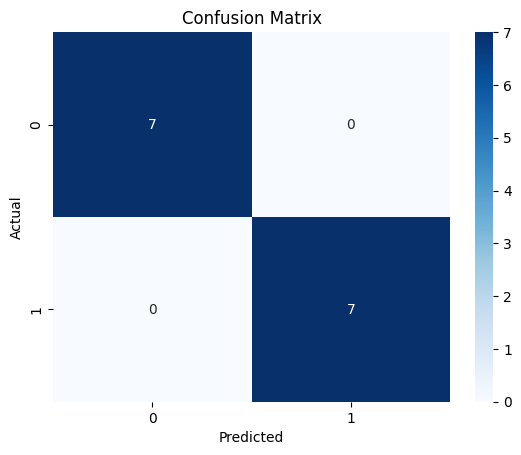

In [28]:

y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
